# 作為對照組，不使用特徵提取

In [407]:
import pandas as pd
from sklearn.cluster import KMeans


raw_data = pd.read_csv('./Data/train_data.csv')
raw_label = pd.read_csv('./Data/train_label.csv')
data = raw_data.drop(columns=['id'])
data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,3.057242,2.895826,6.875436,8.993819,0.0,7.524307,0.632920,0.0,0.0,...,7.359934,9.423847,10.617155,3.294341,10.446329,11.869031,10.742309,9.763863,5.315479,1.407081
1,0.0,1.256286,2.155684,6.898692,9.994891,0.0,7.849955,0.489235,0.0,0.0,...,4.929370,8.641929,9.352719,6.721947,10.154147,13.197991,10.320067,9.413768,8.076142,0.000000
2,0.0,2.480989,2.560446,7.026789,10.046537,0.0,5.643527,0.000000,0.0,0.0,...,5.222897,7.781530,9.610392,5.847346,9.966315,11.994916,9.122202,8.844226,4.175285,0.000000
3,0.0,2.694992,2.588613,7.355571,9.692434,0.0,7.194914,0.420509,0.0,0.0,...,6.367313,9.007605,10.293253,6.116005,10.235296,11.648722,10.143319,9.739455,4.959696,0.000000
4,0.0,4.199900,2.582243,6.706075,10.302936,0.0,6.419613,0.000000,0.0,0.0,...,5.902896,8.868196,10.540942,7.567256,10.989366,11.466535,9.944176,10.677420,4.689176,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0.0,4.814166,3.928105,5.854978,8.846054,0.0,8.960601,2.263846,0.0,0.0,...,7.244916,8.829567,9.903676,5.870767,10.341775,11.360907,10.776088,9.783543,4.544801,0.000000
465,0.0,6.237034,5.043235,6.297397,10.391415,0.0,7.669941,0.913033,0.0,0.0,...,5.669299,8.437523,10.524503,1.467801,9.666187,11.258572,10.062033,9.018030,7.737159,0.000000
466,0.0,2.145808,1.622462,7.065120,10.282903,0.0,7.558979,0.509341,0.0,0.0,...,4.602160,8.037113,9.957584,6.936873,9.331293,12.381094,9.667309,10.350906,6.020940,0.000000
467,0.0,3.028304,2.156138,6.459537,9.488378,0.0,5.319195,0.000000,0.0,0.0,...,6.436851,8.557640,9.749657,5.406037,10.590297,11.449572,9.303614,9.228160,4.403943,0.000000


In [408]:
label = raw_label.drop(columns=['id'])
label

,Class
0,KIRC
1,BRCA
2,LUAD
3,BRCA
4,BRCA
...,...
464,KIRC
465,LUAD
466,BRCA
467,KIRC


In [409]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

labels = kmeans.labels_

C:\Users\eddie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [410]:
eval_label = pd.concat([label, pd.DataFrame(labels, columns=['Predict'])], axis=1)
eval_label

,Class,Predict
0,KIRC,1
1,BRCA,2
2,LUAD,3
3,BRCA,2
4,BRCA,4
...,...,...
464,KIRC,1
465,LUAD,3
466,BRCA,2
467,KIRC,1


In [411]:
eval_label[eval_label['Predict'] == 0].value_counts()

Class  Predict
BRCA   0          41
LUAD   0           2
KIRC   0           1
Name: count, dtype: int64

In [412]:
eval_label[eval_label['Predict'] == 1].value_counts()

Class  Predict
KIRC   1          116
Name: count, dtype: int64

In [413]:
eval_label[eval_label['Predict'] == 2].value_counts()

Class  Predict
BRCA   2          128
Name: count, dtype: int64

In [414]:
eval_label[eval_label['Predict'] == 3].value_counts()

Class  Predict
LUAD   3          106
Name: count, dtype: int64

In [415]:
eval_label[eval_label['Predict'] == 4].value_counts()

Class  Predict
BRCA   4          75
Name: count, dtype: int64

In [416]:
# 創建class名稱替換字典
label_dict = {}

for i in range(5):
    label_dict[i] = eval_label[eval_label['Predict'] == i]['Class'].value_counts().idxmax()

label_dict

{0: 'BRCA', 1: 'KIRC', 2: 'BRCA', 3: 'LUAD', 4: 'BRCA'}

In [417]:
# 將predict_label轉換為class名稱
predict_label_name = pd.DataFrame([label_dict[label] for label in labels], columns=['Predict_Class'])

eval_label = pd.concat([eval_label, predict_label_name], axis=1)
eval_label

,Class,Predict,Predict_Class
0,KIRC,1,KIRC
1,BRCA,2,BRCA
2,LUAD,3,LUAD
3,BRCA,2,BRCA
4,BRCA,4,BRCA
...,...,...,...
464,KIRC,1,KIRC
465,LUAD,3,LUAD
466,BRCA,2,BRCA
467,KIRC,1,KIRC


In [418]:
# 計算分類的準確度
accuracy = eval_label[eval_label['Class'] == eval_label['Predict_Class']].count() / len(eval_label)
print('Accuracy:', accuracy['Class'])

Accuracy: 0.9936034115138592


In [419]:
from sklearn.decomposition import PCA

# 創建PCA模型，將12列特徵降維到2維
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data)

eval_label = pd.concat([eval_label, pd.DataFrame(pca_features, columns=['PCA_1', 'PCA_2'])], axis=1)
eval_label

,Class,Predict,Predict_Class,PCA_1,PCA_2
0,KIRC,1,KIRC,148.733246,-29.640040
1,BRCA,2,BRCA,-47.516384,-8.284368
2,LUAD,3,LUAD,-28.934485,93.873168
3,BRCA,2,BRCA,-53.873466,-15.077190
4,BRCA,4,BRCA,-65.186693,-31.128331
...,...,...,...,...,...
464,KIRC,1,KIRC,160.886583,-46.694399
465,LUAD,3,LUAD,4.528918,110.442258
466,BRCA,2,BRCA,-45.645537,-10.172749
467,KIRC,1,KIRC,158.307565,-52.703045


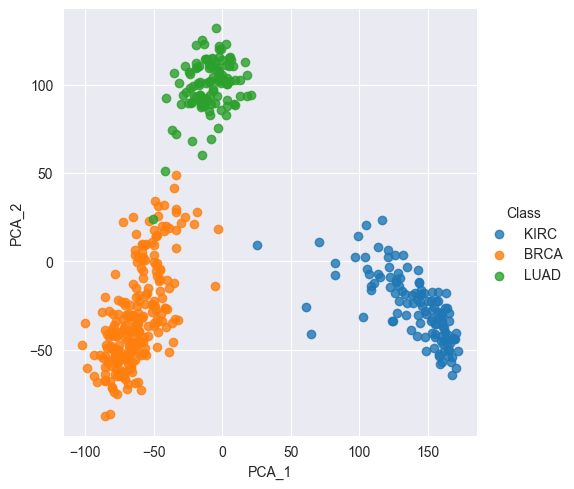

In [420]:
import seaborn as sns

sns.lmplot(data=eval_label, x='PCA_1', y='PCA_2', hue='Class', fit_reg=False)

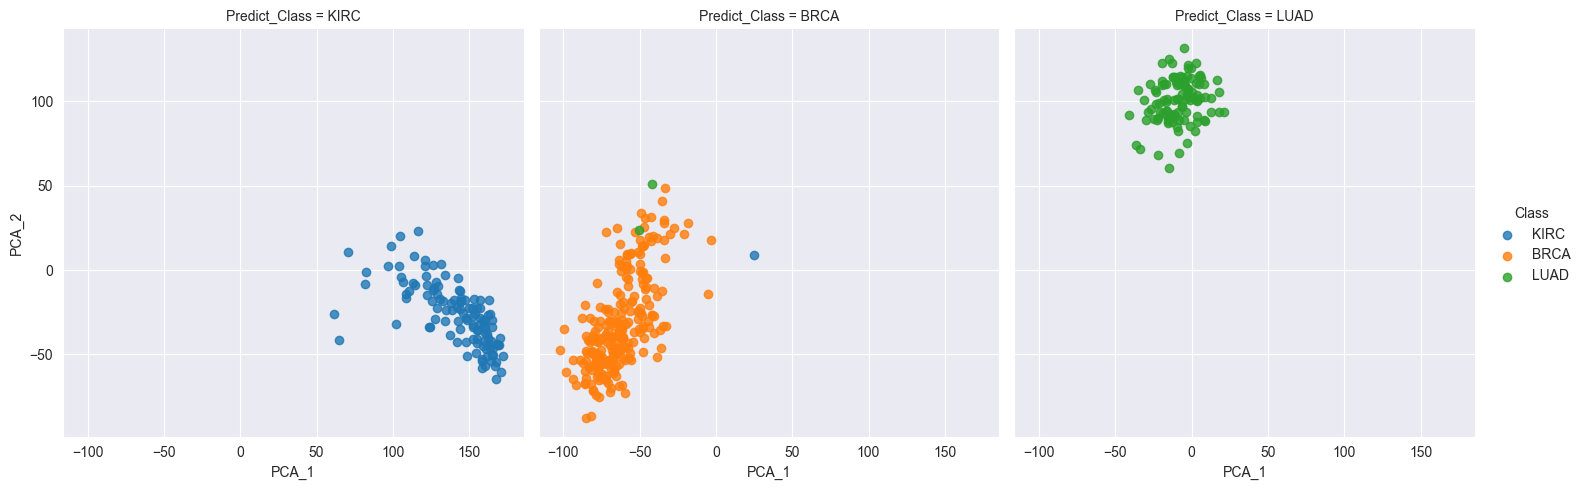

In [421]:
import seaborn as sns

sns.lmplot(data=eval_label, x='PCA_1', y='PCA_2', hue='Class', col='Predict_Class', fit_reg=False)

In [422]:
raw_data = pd.read_csv('./Data/test_data.csv')
raw_label = pd.read_csv('./Data/test_label.csv')
test_data = raw_data.drop(columns=['id'])
test_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,0.000000,2.249354,6.873001,9.621334,0.0,9.786846,0.701150,0.0,0.0,...,4.984740,7.940642,10.724394,2.045757,8.975857,12.607631,10.701263,8.879467,4.211160,0.000000
1,0.0,4.094565,4.704501,7.545559,9.752299,0.0,8.595821,0.859970,0.0,0.0,...,4.598568,7.654557,10.089887,7.107677,8.832156,12.816038,9.317229,9.461801,9.258929,0.000000
2,0.0,4.143565,3.043834,6.211337,8.791908,0.0,7.691960,1.154907,0.0,0.0,...,7.238070,9.143623,10.484390,4.344878,10.448746,10.912785,10.373365,10.094183,3.857364,0.000000
3,0.0,2.215150,1.868845,6.287153,9.273963,0.0,8.317725,1.544040,0.0,0.0,...,6.791345,9.454223,10.475004,6.362757,10.604674,10.969149,10.896014,10.507914,8.706012,0.000000
4,0.0,2.988103,1.811471,5.763507,8.604753,0.0,7.335855,0.787850,0.0,0.0,...,7.156478,8.986857,10.444663,1.824849,10.053587,11.873652,10.603654,9.608950,5.026884,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0.0,4.869200,4.087717,6.369039,9.684507,0.0,7.929903,0.000000,0.0,0.0,...,6.029753,8.875998,10.766554,6.197223,10.013392,9.939708,10.591896,10.316972,3.412782,0.000000
328,0.0,4.288388,3.452490,7.209151,9.875620,0.0,7.332717,0.416948,0.0,0.0,...,6.780349,9.205859,10.176497,6.670727,10.246230,10.790014,10.698991,10.081523,4.376693,0.000000
329,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
330,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [423]:
test_label = raw_label.drop(columns=['id'])
test_label

,Class
0,KIRC
1,BRCA
2,KIRC
3,BRCA
4,KIRC
...,...
327,PRAD
328,PRAD
329,COAD
330,PRAD


In [424]:
predicted_labels = kmeans.predict(test_data)

predicted_labels

array([1, 0, 1, 2, 1, 4, 4, 3, 4, 3, 1, 4, 2, 3, 3, 3, 1, 3, 3, 1, 4, 2,
       1, 1, 1, 1, 3, 4, 2, 2, 3, 2, 4, 2, 1, 2, 4, 0, 0, 4, 4, 1, 1, 1,
       3, 2, 4, 1, 3, 2, 3, 4, 2, 4, 2, 3, 2, 4, 4, 4, 3, 2, 2, 1, 1, 1,
       3, 0, 3, 0, 3, 2, 4, 2, 3, 3, 4, 3, 3, 3, 2, 1, 0, 1, 3, 0, 2, 4,
       4, 2, 3, 2, 1, 4, 3, 3, 1, 3, 3, 3, 1, 1, 0, 1, 1, 2, 1, 2, 3, 1,
       3, 0, 2, 0, 3, 1, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3,
       2, 4, 3, 4, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       3, 3, 0, 2, 3, 2, 2, 2, 2, 2, 3, 2, 0, 2, 4, 2, 4, 4, 4, 2, 2, 2,
       4, 3, 2, 3, 2, 2, 3, 4, 3, 2, 2, 2, 2, 3, 0, 3, 3, 4, 0, 2, 2, 2,
       0, 2, 4, 2, 3, 4, 3, 2, 2, 0, 0, 2, 3, 3, 3, 3, 2, 0, 2, 4, 4, 3,
       3, 3, 2, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 0, 2, 4, 3, 2, 3,
       2, 3, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3,
       3, 2, 0, 2, 0, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 4, 4, 3, 4, 2, 0, 3,
       2, 2, 3, 2, 3, 0, 2, 2, 4, 2, 2, 0, 3, 3, 2,

In [425]:
eval_label = pd.concat([test_label, pd.DataFrame(predicted_labels, columns=['Predict'])], axis=1)
eval_label

,Class,Predict
0,KIRC,1
1,BRCA,0
2,KIRC,1
3,BRCA,2
4,KIRC,1
...,...,...
327,PRAD,4
328,PRAD,2
329,COAD,3
330,PRAD,2


In [426]:
eval_label[eval_label['Predict'] == 0].value_counts()

Class  Predict
COAD   0          19
BRCA   0           9
LUAD   0           1
PRAD   0           1
Name: count, dtype: int64

In [427]:
eval_label[eval_label['Predict'] == 1].value_counts()

Class  Predict
KIRC   1          29
Name: count, dtype: int64

In [428]:
eval_label[eval_label['Predict'] == 2].value_counts()

Class  Predict
PRAD   2          113
BRCA   2           25
Name: count, dtype: int64

In [429]:
eval_label[eval_label['Predict'] == 3].value_counts()

Class  Predict
COAD   3          57
LUAD   3          32
Name: count, dtype: int64

In [430]:
eval_label[eval_label['Predict'] == 4].value_counts()

Class  Predict
BRCA   4          22
PRAD   4          22
COAD   4           2
Name: count, dtype: int64

In [431]:
# 創建class名稱替換字典
label_dict = {}

for i in range(5):
    label_dict[i] = eval_label[eval_label['Predict'] == i]['Class'].value_counts().idxmax()

label_dict

{0: 'COAD', 1: 'KIRC', 2: 'PRAD', 3: 'COAD', 4: 'BRCA'}

In [432]:
# 將predict_label轉換為class名稱
predict_label_name = pd.DataFrame([label_dict[label] for label in predicted_labels], columns=['Predict_Class'])

eval_label = pd.concat([eval_label, predict_label_name], axis=1)
eval_label

,Class,Predict,Predict_Class
0,KIRC,1,KIRC
1,BRCA,0,COAD
2,KIRC,1,KIRC
3,BRCA,2,PRAD
4,KIRC,1,KIRC
...,...,...,...
327,PRAD,4,BRCA
328,PRAD,2,PRAD
329,COAD,3,COAD
330,PRAD,2,PRAD


In [433]:
# 計算分類的準確度
accuracy = eval_label[eval_label['Class'] == eval_label['Predict_Class']].count() / len(eval_label)
print('Accuracy:', accuracy['Class'])

Accuracy: 0.7228915662650602


In [434]:
from sklearn.decomposition import PCA

# 創建PCA模型，將12列特徵降維到2維
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data)

eval_label = pd.concat([eval_label, pd.DataFrame(pca_features, columns=['PCA_1', 'PCA_2'])], axis=1)
eval_label

,Class,Predict,Predict_Class,PCA_1,PCA_2
0,KIRC,1.0,KIRC,148.733246,-29.640039
1,BRCA,0.0,COAD,-47.516384,-8.284368
2,KIRC,1.0,KIRC,-28.934485,93.873168
3,BRCA,2.0,PRAD,-53.873466,-15.077190
4,KIRC,1.0,KIRC,-65.186693,-31.128331
...,...,...,...,...,...
464,NaN,NaN,NaN,160.886583,-46.694399
465,NaN,NaN,NaN,4.528918,110.442259
466,NaN,NaN,NaN,-45.645537,-10.172749
467,NaN,NaN,NaN,158.307565,-52.703045


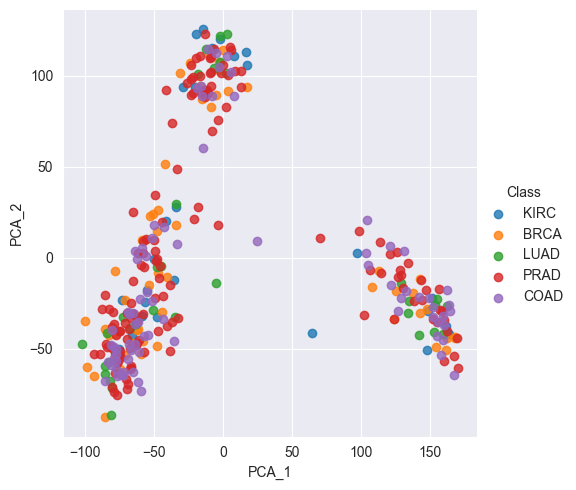

In [435]:
import seaborn as sns

sns.lmplot(data=eval_label, x='PCA_1', y='PCA_2', hue='Class', fit_reg=False)

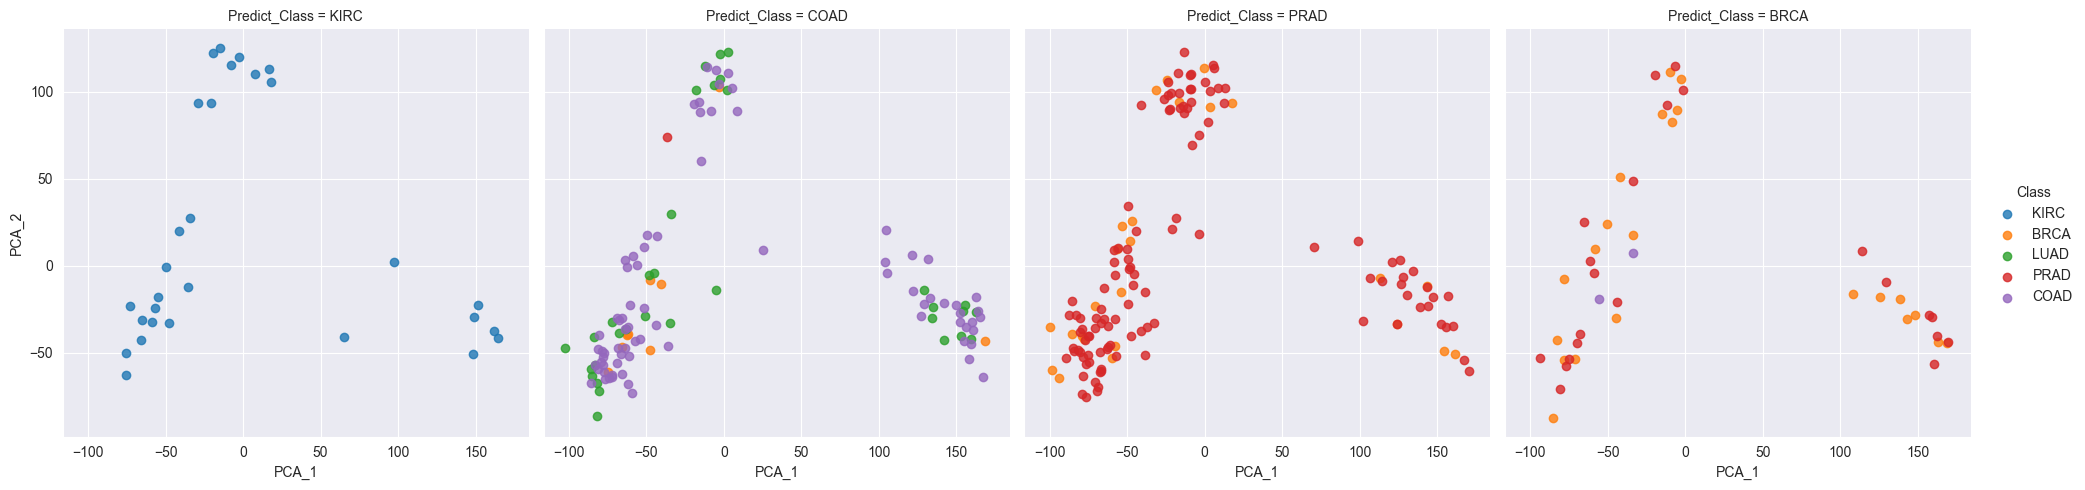

In [436]:
import seaborn as sns

sns.lmplot(data=eval_label, x='PCA_1', y='PCA_2', hue='Class', col='Predict_Class', fit_reg=False)